In [2]:
# Load the packages
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import sys
import csv
import math
import keras
import argparse
import scipy.io
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/affine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.regularizers import L1L2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

In [4]:
#Load dataset
master_data= pd.read_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/tgs-data-science-master-c3f8b3a2900f40ddde655f8ef5f17d00cfaa7033/data/Master_dataset_v1.csv')

/home/affine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,20,23,25,34,48,65,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Columns in dataset
master_data.columns

Index(['Unnamed: 0', 'WellId', 'LeaseId', 'GroupId', 'API', 'FieldName_x',
       'Well Name and Number', 'WellNumber_x', 'OperatorName_x', 'StateName_x',
       'County_x', 'ProductionMonthYear', 'DaysOnProduction', 'Gas', 'Oil',
       'Water', 'ProductionType', 'ProductionTypeName', 'WellsReported',
       'AllocationMethod', 'DisplayFormation_x', 'StateLeaseId', 'WellName',
       'WellNumber_y', 'BasinName', 'DisplayFormation_y', 'Township',
       'TownshipDirection', 'Range', 'RangeDirection', 'Section', 'District',
       'Abstract', 'Survey', 'Block', 'Offshore', 'Area', 'OffshoreBlock',
       'QuarterQuarter', 'FootageNS', 'DirectionNS', 'FootageEW',
       'DirectionEW', 'SurfaceLatitude', 'SurfaceLongitude', 'BottomLatitude',
       'BottomLongitude', 'SpudDate', 'PlugDate', 'CompletionDate',
       'FirstProductionDate', 'FirstMonth', 'HasProduction', 'WellType',
       'TotalVerticalDepth', 'MeasuredDepth', 'ElevationGround',
       'ElevationKellyBushing', 'ElevationWat

In [6]:
#selecting Operator 'Occidental W TX OVERTHRUST INC.'
master_data1=master_data[master_data.OperatorName_x=="OCCIDENTAL W TX OVERTHRUST INC."]
#master_data1.head()

In [7]:
#select required API
master_data1=master_data1[master_data1.API==42371380500000]#42371381890000]#42371378930000]
labels=['Oil','ProductionMonthYear1','YearMonth']
master_data1=master_data1[labels]

#Sort data based on YearMonth
master_data1=master_data1.sort_values(by=['YearMonth'])#, ascending=[1, 1],axis=1)
#master_data1.tail()

In [8]:
master_data2=master_data1
master_data2=pd.DataFrame(master_data2)
# master_data2['start_date']=datetime.strptime(master_data1['ProductionMonthYear1'].iloc[0], "%Y-%m-%d")
# print(type(pd.DataFrame(master_data2['start_date']).iloc[0,0]))
# print(type(pd.DataFrame(master_data2['ProductionMonthYear1']).iloc[0,0]))

In [9]:
# master_data2['ProductionMonthYear1']=master_data2['ProductionMonthYear1'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# master_data2['days_age']=master_data2['ProductionMonthYear1'].sub(master_data2['start_date'])
# master_data2['days_age']=master_data2['days_age']/np.timedelta64(1,'D')

In [10]:
#Set YearMonth as Index for production
master_data2=master_data2[['YearMonth','Oil']]#,'days_age']]
master_data2=master_data2.iloc[:-1,:]# removing 201708 & 201709 values as they were zeros
master_data2.set_index('YearMonth')

,Oil
YearMonth,
200807,676.000
200808,827.000
200809,423.000
200810,330.000
200811,255.000
200812,240.000
200901,189.000
200902,168.000
200903,154.000


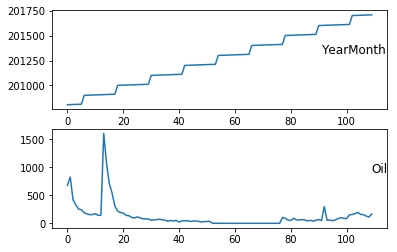

In [11]:
from matplotlib import pyplot
# load dataset
dataset = master_data2
values = dataset.values

# specify columns to plot
groups = [0,1]#,2]#3,4]#,5,6,7,8,9,10]
i = 0
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i+1)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
#Define lag(time steps for training) and n_seq(number of time steps to be predicted in future)
n_seq = 12
n_feature=1
n_lag= 12


In [14]:
# load dataset
dataset = master_data2.iloc[:,1:]
values = dataset.values
print(values.shape)
# ensure all data is float
values = values.astype('float32')
#print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_seq)

# drop columns we don't want to predict
# reframed.drop(reframed.iloc[:,25:], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

(110, 1)
    var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    0.421709    0.515908    0.263880   0.205864   0.159077   0.149719   
13    0.515908    0.263880    0.205864   0.159077   0.149719   0.117904   
14    0.263880    0.205864    0.159077   0.149719   0.117904   0.104803   
15    0.205864    0.159077    0.149719   0.117904   0.104803   0.096070   
16    0.159077    0.149719    0.117904   0.104803   0.096070   0.097318   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)     ...      var1(t+2)  \
12   0.117904   0.104803   0.096070   0.097318     ...       0.673113   
13   0.104803   0.096070   0.097318   0.107299     ...       0.441672   
14   0.096070   0.097318   0.107299   0.087960     ...       0.336245   
15   0.097318   0.107299   0.087960   0.090455     ...       0.191516   
16   0.107299   0.087960   0.090455   1.000000     ...       0.135371   

    var1(t+3)  var1(t+4)  var1(t+5)  var1(t+6)  var1(t+7)  var1(t+8)  \
12   0.441672   0.336245   0.

In [15]:
# split into train and test sets
values = reframed.values
train = values[:-1, :]
test = values[-1:, :]

# split into input and outputs
train_X, train_y = train[:, :-(n_seq)], train[:, -(n_seq):]
test_X, test_y = test[:, :-n_seq], test[:, -n_seq:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_feature))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(86, 12, 1) (86, 12) (1, 12, 1) (1, 12)


In [46]:
#Hyperparameters
h1=n_lag*2
h2=n_lag*2
h3=n_seq
h4=n_seq
drop1=0.3
drop2=0.2
drop3=0.1 
drop4=0.1
n_y=n_seq
epoch=1000
batch_size=16
lr=0.0009
L1=0.00
L2=0.03

In [47]:
# model.add(LSTM(h1, batch_input_shape=(batch_size,train_X.shape[1],train_X.shape[2]), stateful=True))#,return_sequences=True, recurrent_regularizer=reg))

In [48]:
# design network
model = Sequential()
reg = L1L2(l1=L1, l2=L2)
model.add(LSTM(h1, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True, recurrent_regularizer=reg))
model.add(Dropout(drop1, seed = 1))
model.add(LSTM(h2,return_sequences=True))
model.add(Dropout(drop2, seed = 1))
model.add(LSTM(h3,return_sequences=True))
model.add(Dropout(drop3, seed = 1))
model.add(LSTM(h4,return_sequences=False))
model.add(Dropout(drop4, seed = 1))
model.add(Dense(n_seq, activation='relu'))
model.add(Dense(n_y, activation='relu'))
adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mae', optimizer= adam)



In [49]:
# model=load_model('LSTM_12_month.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights.hdf5')
# model.set_weights(weights)
# model.load_weights('weights.hdf5')
# model.load_weights('weights_42371380500000.hdf5')

Train on 86 samples, validate on 1 samples
Epoch 1/1000
 - 2s - loss: 0.7384 - val_loss: 0.7412
Epoch 2/1000
 - 0s - loss: 0.6784 - val_loss: 0.6796
Epoch 3/1000
 - 0s - loss: 0.6250 - val_loss: 0.6257
Epoch 4/1000
 - 0s - loss: 0.5755 - val_loss: 0.5793
Epoch 5/1000
 - 0s - loss: 0.5293 - val_loss: 0.5363
Epoch 6/1000
 - 0s - loss: 0.4874 - val_loss: 0.4957
Epoch 7/1000
 - 0s - loss: 0.4494 - val_loss: 0.4585
Epoch 8/1000
 - 0s - loss: 0.4146 - val_loss: 0.4245
Epoch 9/1000
 - 0s - loss: 0.3830 - val_loss: 0.3937
Epoch 10/1000
 - 0s - loss: 0.3539 - val_loss: 0.3661
Epoch 11/1000
 - 0s - loss: 0.3273 - val_loss: 0.3405
Epoch 12/1000
 - 0s - loss: 0.3031 - val_loss: 0.3175
Epoch 13/1000
 - 0s - loss: 0.2808 - val_loss: 0.2958
Epoch 14/1000
 - 0s - loss: 0.2601 - val_loss: 0.2756
Epoch 15/1000
 - 0s - loss: 0.2417 - val_loss: 0.2575
Epoch 16/1000
 - 0s - loss: 0.2249 - val_loss: 0.2416
Epoch 17/1000
 - 0s - loss: 0.2089 - val_loss: 0.2267
Epoch 18/1000
 - 0s - loss: 0.1949 - val_loss: 0

 - 0s - loss: 0.0240 - val_loss: 0.0481
Epoch 152/1000
 - 0s - loss: 0.0238 - val_loss: 0.0472
Epoch 153/1000
 - 0s - loss: 0.0240 - val_loss: 0.0484
Epoch 154/1000
 - 0s - loss: 0.0242 - val_loss: 0.0478
Epoch 155/1000
 - 0s - loss: 0.0238 - val_loss: 0.0475
Epoch 156/1000
 - 0s - loss: 0.0241 - val_loss: 0.0475
Epoch 157/1000
 - 0s - loss: 0.0238 - val_loss: 0.0474
Epoch 158/1000
 - 0s - loss: 0.0244 - val_loss: 0.0457
Epoch 159/1000
 - 0s - loss: 0.0244 - val_loss: 0.0472
Epoch 160/1000
 - 0s - loss: 0.0242 - val_loss: 0.0478
Epoch 161/1000
 - 0s - loss: 0.0236 - val_loss: 0.0464
Epoch 162/1000
 - 0s - loss: 0.0237 - val_loss: 0.0477
Epoch 163/1000
 - 0s - loss: 0.0239 - val_loss: 0.0465
Epoch 164/1000
 - 0s - loss: 0.0240 - val_loss: 0.0471
Epoch 165/1000
 - 0s - loss: 0.0240 - val_loss: 0.0442
Epoch 166/1000
 - 0s - loss: 0.0238 - val_loss: 0.0480
Epoch 167/1000
 - 0s - loss: 0.0239 - val_loss: 0.0490
Epoch 168/1000
 - 0s - loss: 0.0246 - val_loss: 0.0462
Epoch 169/1000
 - 0s - lo

 - 0s - loss: 0.0195 - val_loss: 0.0318
Epoch 301/1000
 - 0s - loss: 0.0190 - val_loss: 0.0314
Epoch 302/1000
 - 0s - loss: 0.0201 - val_loss: 0.0304
Epoch 303/1000
 - 0s - loss: 0.0193 - val_loss: 0.0280
Epoch 304/1000
 - 0s - loss: 0.0200 - val_loss: 0.0313
Epoch 305/1000
 - 0s - loss: 0.0188 - val_loss: 0.0280
Epoch 306/1000
 - 0s - loss: 0.0203 - val_loss: 0.0347
Epoch 307/1000
 - 0s - loss: 0.0199 - val_loss: 0.0326
Epoch 308/1000
 - 0s - loss: 0.0193 - val_loss: 0.0330
Epoch 309/1000
 - 0s - loss: 0.0192 - val_loss: 0.0353
Epoch 310/1000
 - 0s - loss: 0.0192 - val_loss: 0.0347
Epoch 311/1000
 - 0s - loss: 0.0186 - val_loss: 0.0297
Epoch 312/1000
 - 0s - loss: 0.0192 - val_loss: 0.0290
Epoch 313/1000
 - 0s - loss: 0.0188 - val_loss: 0.0272
Epoch 314/1000
 - 0s - loss: 0.0186 - val_loss: 0.0287
Epoch 315/1000
 - 0s - loss: 0.0192 - val_loss: 0.0325
Epoch 316/1000
 - 0s - loss: 0.0194 - val_loss: 0.0273
Epoch 317/1000
 - 0s - loss: 0.0189 - val_loss: 0.0281
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0168 - val_loss: 0.0299
Epoch 450/1000
 - 0s - loss: 0.0161 - val_loss: 0.0284
Epoch 451/1000
 - 0s - loss: 0.0172 - val_loss: 0.0346
Epoch 452/1000
 - 0s - loss: 0.0177 - val_loss: 0.0314
Epoch 453/1000
 - 0s - loss: 0.0184 - val_loss: 0.0317
Epoch 454/1000
 - 0s - loss: 0.0174 - val_loss: 0.0302
Epoch 455/1000
 - 0s - loss: 0.0165 - val_loss: 0.0270
Epoch 456/1000
 - 0s - loss: 0.0168 - val_loss: 0.0320
Epoch 457/1000
 - 0s - loss: 0.0182 - val_loss: 0.0321
Epoch 458/1000
 - 0s - loss: 0.0165 - val_loss: 0.0298
Epoch 459/1000
 - 0s - loss: 0.0175 - val_loss: 0.0340
Epoch 460/1000
 - 0s - loss: 0.0179 - val_loss: 0.0320
Epoch 461/1000
 - 0s - loss: 0.0185 - val_loss: 0.0305
Epoch 462/1000
 - 0s - loss: 0.0165 - val_loss: 0.0323
Epoch 463/1000
 - 0s - loss: 0.0168 - val_loss: 0.0297
Epoch 464/1000
 - 0s - loss: 0.0169 - val_loss: 0.0276
Epoch 465/1000
 - 0s - loss: 0.0172 - val_loss: 0.0334
Epoch 466/1000
 - 0s - loss: 0.0175 - val_loss: 0.0301
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0179 - val_loss: 0.0288
Epoch 599/1000
 - 0s - loss: 0.0168 - val_loss: 0.0304
Epoch 600/1000
 - 0s - loss: 0.0150 - val_loss: 0.0287
Epoch 601/1000
 - 0s - loss: 0.0162 - val_loss: 0.0285
Epoch 602/1000
 - 0s - loss: 0.0156 - val_loss: 0.0271
Epoch 603/1000
 - 0s - loss: 0.0165 - val_loss: 0.0287
Epoch 604/1000
 - 0s - loss: 0.0157 - val_loss: 0.0321
Epoch 605/1000
 - 0s - loss: 0.0168 - val_loss: 0.0306
Epoch 606/1000
 - 0s - loss: 0.0152 - val_loss: 0.0277
Epoch 607/1000
 - 0s - loss: 0.0163 - val_loss: 0.0264
Epoch 608/1000
 - 0s - loss: 0.0157 - val_loss: 0.0263
Epoch 609/1000
 - 0s - loss: 0.0153 - val_loss: 0.0259
Epoch 610/1000
 - 0s - loss: 0.0160 - val_loss: 0.0263
Epoch 611/1000
 - 0s - loss: 0.0159 - val_loss: 0.0302
Epoch 612/1000
 - 0s - loss: 0.0160 - val_loss: 0.0303
Epoch 613/1000
 - 0s - loss: 0.0153 - val_loss: 0.0285
Epoch 614/1000
 - 0s - loss: 0.0159 - val_loss: 0.0280
Epoch 615/1000
 - 0s - loss: 0.0154 - val_loss: 0.0290
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0149 - val_loss: 0.0280
Epoch 748/1000
 - 0s - loss: 0.0140 - val_loss: 0.0255
Epoch 749/1000
 - 0s - loss: 0.0150 - val_loss: 0.0249
Epoch 750/1000
 - 0s - loss: 0.0145 - val_loss: 0.0252
Epoch 751/1000
 - 0s - loss: 0.0138 - val_loss: 0.0251
Epoch 752/1000
 - 0s - loss: 0.0137 - val_loss: 0.0304
Epoch 753/1000
 - 0s - loss: 0.0154 - val_loss: 0.0315
Epoch 754/1000
 - 0s - loss: 0.0159 - val_loss: 0.0256
Epoch 755/1000
 - 0s - loss: 0.0150 - val_loss: 0.0299
Epoch 756/1000
 - 0s - loss: 0.0154 - val_loss: 0.0317
Epoch 757/1000
 - 0s - loss: 0.0146 - val_loss: 0.0300
Epoch 758/1000
 - 0s - loss: 0.0154 - val_loss: 0.0302
Epoch 759/1000
 - 0s - loss: 0.0142 - val_loss: 0.0301
Epoch 760/1000
 - 0s - loss: 0.0168 - val_loss: 0.0290
Epoch 761/1000
 - 0s - loss: 0.0155 - val_loss: 0.0271
Epoch 762/1000
 - 0s - loss: 0.0157 - val_loss: 0.0305
Epoch 763/1000
 - 0s - loss: 0.0136 - val_loss: 0.0292
Epoch 764/1000
 - 0s - loss: 0.0136 - val_loss: 0.0308
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0123 - val_loss: 0.0274
Epoch 897/1000
 - 0s - loss: 0.0120 - val_loss: 0.0256
Epoch 898/1000
 - 0s - loss: 0.0138 - val_loss: 0.0304
Epoch 899/1000
 - 0s - loss: 0.0133 - val_loss: 0.0291
Epoch 900/1000
 - 0s - loss: 0.0149 - val_loss: 0.0261
Epoch 901/1000
 - 0s - loss: 0.0143 - val_loss: 0.0263
Epoch 902/1000
 - 0s - loss: 0.0137 - val_loss: 0.0302
Epoch 903/1000
 - 0s - loss: 0.0140 - val_loss: 0.0279
Epoch 904/1000
 - 0s - loss: 0.0127 - val_loss: 0.0251
Epoch 905/1000
 - 0s - loss: 0.0127 - val_loss: 0.0260
Epoch 906/1000
 - 0s - loss: 0.0161 - val_loss: 0.0300
Epoch 907/1000
 - 0s - loss: 0.0140 - val_loss: 0.0279
Epoch 908/1000
 - 0s - loss: 0.0140 - val_loss: 0.0260
Epoch 909/1000
 - 0s - loss: 0.0140 - val_loss: 0.0261
Epoch 910/1000
 - 0s - loss: 0.0157 - val_loss: 0.0267
Epoch 911/1000
 - 0s - loss: 0.0137 - val_loss: 0.0242
Epoch 912/1000
 - 0s - loss: 0.0130 - val_loss: 0.0260
Epoch 913/1000
 - 0s - loss: 0.0139 - val_loss: 0.0259
Epoch 914/1000
 - 0s - lo

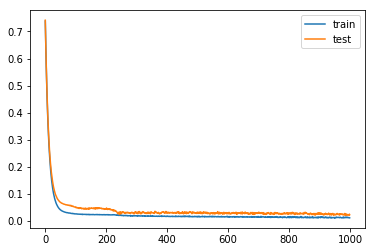

In [50]:
# fit network
history = model.fit(train_X, train_y, epochs = epoch, batch_size = batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# model.save('LSTM_12_month_42371380500000_v2.h5')
# del model

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [51]:
#SAVE THE MODEL

model.save('LSTM_12_month_42371380500000_v4.h5')
# model=load_model('LSTM_12_month_42371380500000_v2.h5')
# weights=model.get_weights()
# print(weights)
model.save_weights('weights_42371380500000_v4.hdf5')
# model.set_weights(weights)
# weights=model.load_weights('weights_42371380500000_v2.hdf5')
# model.set_weights(weights)

In [52]:
#Predict the model on test
yhat = model.predict(test_X)
# print(yhat.shape)
# print(test_y.shape)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# print(inv_yhat.shape)
inv_yhat = inv_yhat[:,:]

# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE = mean_absolute_error(inv_y, inv_yhat)
print("MAE = "+str(MAE))

Test RMSE: 47.352
MAE = 37.6509


In [53]:
# make a prediction on train
yhat_train = model.predict(train_X)

# invert scaling for train forecast
inv_yhat_train = scaler.inverse_transform(yhat_train)

# invert scaling for actual train
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE_train = mean_absolute_error(inv_y_train, inv_yhat_train)
print("MAE Train = "+str(MAE_train))

Train RMSE: 57.239
MAE Train = 17.7597


In [54]:
# Calculate Mape
# Note LSTM always gives 1 step shifted reponse

#test Mape
Mape_test1=[]
for i in range(n_seq-1):
    mape1=(np.abs(inv_y[:,i]-inv_yhat[:,i+1])/(inv_y[:,i]+1))
    Mape_test1.append(mape1)
#print(Mape_test1)
Mape_test=np.mean(Mape_test1)

#Mape_test=np.mean(np.abs(inv_y[i]-inv_yhat[i+1])/(inv_y[i]+1))
#Mape_train=np.mean(np.abs(inv_y_train[i]-inv_yhat_train[i+1])/(inv_y_train[i]+1))
Mape_train=np.mean(np.abs(inv_y_train-inv_yhat_train)/(inv_y_train+1))

print("MAPE Train = "+str(Mape_train))
print("MAPE Test = "+str(Mape_test))

MAPE Train = 1.23521
MAPE Test = 0.212772


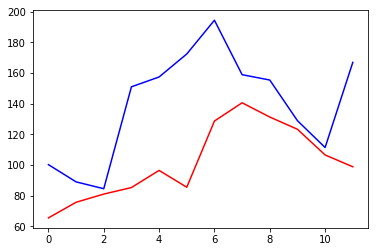

In [55]:
df1=pd.DataFrame(inv_y)
df2=pd.DataFrame(inv_yhat)
value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq,1)
value2=value2.reshape(n_seq,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

In [56]:
# df1=pd.DataFrame(inv_y_train[0,:])
# df2=pd.DataFrame(inv_yhat_train[0,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[20,:])
# df2=pd.DataFrame(inv_yhat_train[20,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[40,:])
# df2=pd.DataFrame(inv_yhat_train[40,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

In [57]:
for i in range(len(inv_y)):
    for j in range(len(inv_y[i])):
        print(str(inv_y[i][j])+", "+str(inv_yhat[i][j]))

100.333, 65.5788
89.083, 75.7843
84.62, 81.1231
151.076, 85.3788
157.5, 96.5633
172.5, 85.5962
194.5, 128.75
159.0, 140.666
155.5, 131.382
129.0, 123.396
111.5, 106.642
167.0, 98.941


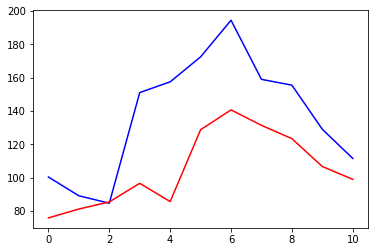

    YearMonth      Oil  Oil_Actual  Oil_Predicted
0    201609.0  100.333  100.332993      75.784325
1    201610.0   89.083   89.083000      81.123055
2    201611.0   84.620   84.620003      85.378822
3    201612.0  151.076  151.076004      96.563347
4    201701.0  157.500  157.500000      85.596153
5    201702.0  172.500  172.500000     128.750092
6    201703.0  194.500  194.500000     140.665695
7    201704.0  159.000  159.000000     131.382309
8    201705.0  155.500  155.500000     123.395576
9    201706.0  129.000  129.000000     106.642021
10   201707.0  111.500  111.500000      98.940956


In [60]:
# get test results in CSV
df1=pd.DataFrame(inv_y[:,:-1])
df1=pd.DataFrame.transpose(df1)
df2=pd.DataFrame(inv_yhat[:,1:])
df2=pd.DataFrame.transpose(df2)

value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq-1,1)
value2=value2.reshape(n_seq-1,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

df3=pd.DataFrame(np.array(master_data2.iloc[-n_seq:-1,:]))
df3.columns=['YearMonth','Oil']
df4=pd.concat([df3,df1,df2],axis=1)
df4.columns=['YearMonth','Oil','Oil_Actual','Oil_Predicted']
print(df4)

In [61]:
df4.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371380500000_prediction.csv')

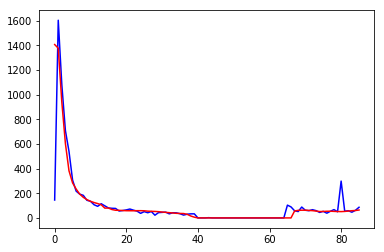

(86, 2)


,Year-Month,Oil,Actual_Oil,Predicted_Oil
0,200907.0,145.000,145.000000,1405.988892
1,200908.0,1603.000,1603.000000,1376.162109
2,200909.0,1079.000,1079.000000,938.002563
3,200910.0,708.000,708.000000,602.898132
4,200911.0,539.000,539.000000,382.091614
5,200912.0,307.000,307.000000,284.139893
6,201001.0,217.000,217.000000,234.032074
7,201002.0,193.000,193.000000,192.952194
8,201003.0,183.000,183.000000,166.812073
9,201004.0,143.000,143.000000,148.485367


In [62]:
df1=pd.DataFrame(inv_y_train)
df11=df1.iloc[:,0]

df2=pd.DataFrame(inv_yhat_train)
df12=df2.iloc[:,0]


value1=df11.values
value2=df12.values
# value1=value1.reshape(n_seq-1,1)
# value2=value2.reshape(n_seq-1,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

df3=pd.DataFrame(np.array(master_data2.iloc[12:-n_seq,:]))
print(df3.shape)
df3.columns=['YearMonth','Oil']

df_train=pd.concat([df3,df11,df12], axis=1)
df_train1=pd.DataFrame(np.array(df_train))
df_train1.columns=["Year-Month","Oil","Actual_Oil","Predicted_Oil"]
df_train1

In [63]:
df_train1.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371380500000_train_prediction.csv')